In [48]:
import matplotlib.pyplot as plt
import numpy as np
from struct import unpack

folder = "./b_results/test_polinome/test4/"
folder_rz = folder

In [49]:
def paint_layer(x,y,q, x1,x2,y1,y2):
    fig,ax=plt.subplots(1,1)
    plt.xticks(rotation = 90)
    #Решение на сетке, которая равномерно разбивает область на n элементов по каждой координате
    n = 18
    solutions = set()
    for i in np.linspace(0,len(x)-1,n)[1:-1]:
        for j in np.linspace(0,len(y)-1,n)[1:-1]:
            solutions.add(q[int(j)][int(i)])
    print("solutions", sorted(solutions))
    
    #  Создаем массив RGB цветов каждой области:
    color_region = np.zeros((len(solutions), 3))
    color_region[:, 1:] = 0.2
    color_region[:, 0] = np.linspace(0, 1, len(solutions))
    
    c1 = ax.contourf(x,y,q,levels = sorted(list(solutions)),colors = color_region)
    # c1 = ax.contour(x,y,q)
    plt.colorbar(c1)

    x = np.array(x)
    y = np.array(y)
    # xlim =  [np.absolute(x-x1).argmin(),np.absolute(x-x2).argmin()]
    # ylim =  [np.absolute(y-y1).argmin(),np.absolute(y-y2).argmin()]
    # print("limits:",xlim,ylim)
    fig,ax=plt.subplots(1,1)
    # x = x[xlim[0]:xlim[1]]
    # y = y[ylim[0]:ylim[1]]
    # q = q[ylim[0]:ylim[1],xlim[0]:xlim[1]]
    c2 = ax.contourf(x,y,q,levels = 20)
    ax.set_xlim(x1,x2)
    ax.set_ylim(y1,y2)
    plt.colorbar(c2)
    plt.xticks(rotation = 90)

In [50]:
def solution_rz_read(filename: str):
    # Прочесть сетки по r и z и решение
    # Вернет одномерные массивы r и z и двумерный массив q
    f = open(folder_rz + filename, 'rb')
    sizes = []
    sizes.append(int.from_bytes(f.read(4), 'little'))
    sizes.append(int.from_bytes(f.read(4), 'little'))
    print(sizes)

    r_mesh = unpack(str(sizes[0])+ "d", f.read(8*sizes[0]))
    z_mesh = unpack(str(sizes[1])+ "d", f.read(8*sizes[1]))
    q_size = sizes[0]*sizes[1]
    q = unpack(str(q_size)+"d",f.read(8*q_size))
    print(r_mesh)
    print(z_mesh)
    q = np.array(q)
    q = q.reshape(sizes[1],sizes[0])
    print(q.shape)
    f.close()
    return r_mesh, z_mesh, q

In [204]:
from mpl_toolkits.mplot3d import Axes3D
def paint_layer_uniform_3d(x,y,q,lims: tuple,lvls):
    x0,x1,y0,y1 = lims

    fig = plt.figure(figsize=(6,6))
    ax_3d = fig.add_subplot(projection='3d')
    ax_3d.set_xlabel('x')
    ax_3d.set_ylabel('y')
    ax_3d.set_zlabel('z')

    xgrid,ygrid = np.meshgrid(x,y)
    ax_3d.plot_wireframe(xgrid,ygrid,q)

    plt.show()

In [295]:
from matplotlib.ticker import ScalarFormatter
def paint_layer_uniform(x,y,q,lims: tuple,lvls):
    x0,x1,y0,y1 = lims

    fig,ax=plt.subplots(1,1) # Создадим фигуру
    fig.set_size_inches(5,5)
    ax.set_aspect(1) # Отношение размеров координатных осей
    plt.xticks(rotation = 90) # Повернем метки по x на 90 градусов, чтобы они не перекрывали друг друга

    if(lvls==0): # Если не указано сколько уровней, то не указываем
        c = ax.contourf(x,y,q)
    else:
        c = ax.contourf(x,y,q,levels = lvls)

    # sf = ScalarFormatter()
    # sf.set_powerlimits((0, 0))
    # ax.xaxis.set_major_formatter(sf)
    ax.set_xlabel('r, м')
    ax.set_ylabel('z, м')
    plt.colorbar(c,extendrect = True, drawedges = True, label = "V, Дж/Кл")


[241, 241]
(0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125, 1.25, 1.375, 1.5, 1.625, 1.75, 1.875, 2.0, 2.125, 2.25, 2.375, 2.5, 2.625, 2.75, 2.875, 3.0, 3.125, 3.25, 3.375, 3.5, 3.625, 3.75, 3.875, 4.0, 4.125, 4.25, 4.375, 4.5, 4.625, 4.75, 4.875, 5.0, 5.125, 5.25, 5.375, 5.5, 5.625, 5.75, 5.875, 6.0, 6.125, 6.25, 6.375, 6.5, 6.625, 6.75, 6.875, 7.0, 7.125, 7.25, 7.375, 7.5, 7.625, 7.75, 7.875, 8.0, 8.125, 8.25, 8.375, 8.5, 8.625, 8.75, 8.875, 9.0, 9.125, 9.25, 9.375, 9.5, 9.625, 9.75, 9.875, 10.0, 10.125, 10.25, 10.375, 10.5, 10.625, 10.75, 10.875, 11.0, 11.125, 11.25, 11.375, 11.5, 11.625, 11.75, 11.875, 12.0, 12.125, 12.25, 12.375, 12.5, 12.625, 12.75, 12.875, 13.0, 13.125, 13.25, 13.375, 13.5, 13.625, 13.75, 13.875, 14.0, 14.125, 14.25, 14.375, 14.5, 14.625, 14.75, 14.875, 15.0, 15.125, 15.25, 15.375, 15.5, 15.625, 15.75, 15.875, 16.0, 16.125, 16.25, 16.375, 16.5, 16.625, 16.75, 16.875, 17.0, 17.125, 17.25, 17.375, 17.5, 17.625, 17.75, 17.875, 18.0, 18.125, 18.25, 18.

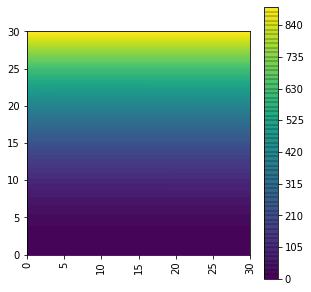

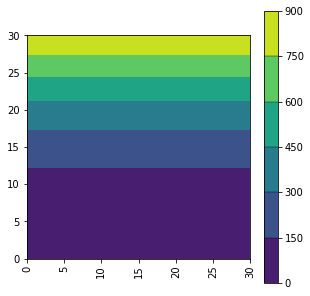

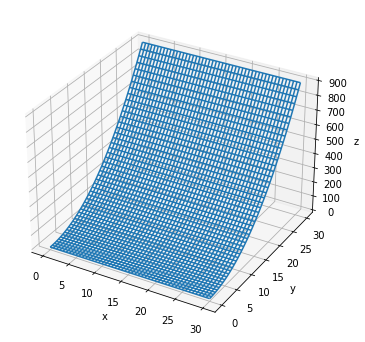

In [246]:
# Отрисовка решения двумерной задачи
folder_rz = "./b_results/meshs/mesh1/"
folder_rz = "./b_results/test_polinome/test4/"
r,z,q = solution_rz_read("solution_rz_q")
rad = 0.02
start = 0
cut = 241
r0,r1,z0,z1 = start,cut,start,cut
paint_layer_uniform(r[r0:r1],z[z0:z1],q[r0:r1,z0:z1],(0,0,0,0),60)
paint_layer_uniform(r,z,q,(0,0,0,0),0)
paint_layer_uniform_3d(r,z,q,(0,0,0,0),0)

[106, 106]
(0.0, 1e-06, 2.2e-06, 3.64e-06, 5.368e-06, 7.4416e-06, 9.92992e-06, 1.2915903999999999e-05, 1.64990848e-05, 2.0798901759999998e-05, 2.5958682111999995e-05, 3.215041853439999e-05, 3.958050224127999e-05, 4.8496602689535985e-05, 5.9195923227443176e-05, 7.20351078729318e-05, 8.744212944751816e-05, 0.00010593055533702178, 0.00012811666640442614, 0.00015473999968531138, 0.00018668799962237364, 0.00022502559954684837, 0.00027103071945621803, 0.0003262368633474616, 0.0003924842360169539, 0.00047198108322034463, 0.0005673772998644136, 0.0006818527598372962, 0.0008192233118047554, 0.0009840679741657064, 0.0011818815689988477, 0.0014192578827986171, 0.0017041094593583405, 0.0020459313512300086, 0.0024561176214760103, 0.002948341145771212, 0.0035390093749254545, 0.004247811249910545, 0.005098373499892654, 0.006119048199871184, 0.00734385783984542, 0.008813629407814504, 0.010577355289377404, 0.012693826347252885, 0.01523359161670346, 0.018281309940044153, 0.021938571928052982, 0.02632728

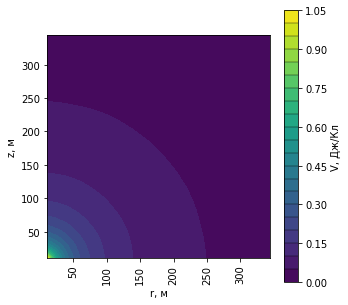

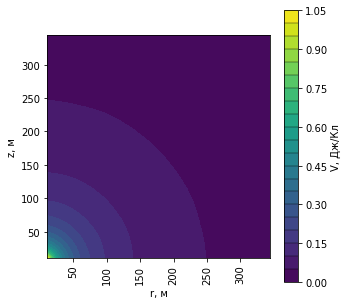

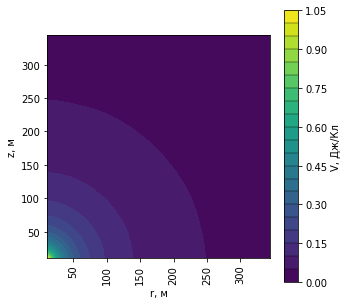

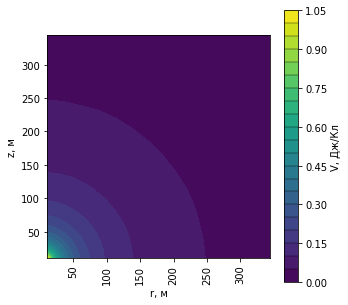

In [296]:
# Отрисовка тестов сетки для rz
for i in range(4):
    folder_rz = "./b_results/rz_optim/"+str(i)+"/"
    r,z,q = solution_rz_read("solution_rz_q")
    r = r[::2**i]
    z = z[::2**i]
    q = q[::2**i,::2**i]
    print(f"size r:{len(r)}, z:{len(z)}, q:{q.shape}")
    start = 80
    cut = 100 #106 - max
    r0,r1,z0,z1 = start,cut,start,cut
    paint_layer_uniform(r[r0:r1],z[z0:z1],q[r0:r1,z0:z1],(0,0,0,0),20)


[285, 285]
(0.0, 0.001, 0.00205, 0.0031525000000000004, 0.004310125000000001, 0.005525631250000001, 0.0068019128125000015, 0.008142008453125002, 0.009549108875781254, 0.011026564319570317, 0.012577892535548835, 0.014206787162326278, 0.015917126520442592, 0.017712982846464723, 0.01959863198878796, 0.021578563588227358, 0.023657491767638726, 0.025840366356020664, 0.0281323846738217, 0.030539003907512786, 0.03306595410288843, 0.03571925180803285, 0.0385052143984345, 0.04143047511835622, 0.044501998874274036, 0.04772709881798774, 0.05111345375888713, 0.05466912644683149, 0.05840258276917307, 0.06232271190763172, 0.0664388475030133, 0.07076078987816398, 0.07529882937207218, 0.08006377084067579, 0.08506695938270958, 0.09032030735184507, 0.09583632271943733, 0.10162813885540921, 0.10770954579817968, 0.11409502308808867, 0.12079977424249311, 0.12783976295461777, 0.13523175110234867, 0.1429933386574661, 0.1511430055903394, 0.1597001558698564, 0.1686851636633492, 0.1781194218465167, 0.1880253929

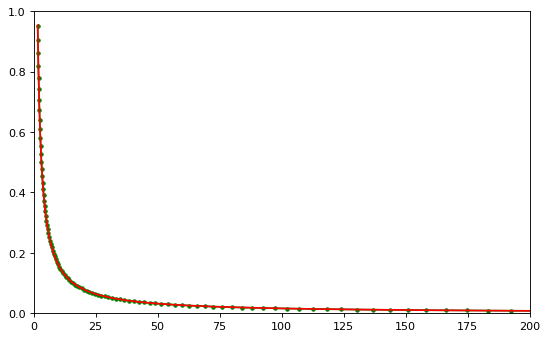

In [435]:
fig, ax = plt.subplots(1,1,figsize=(8, 5), dpi= 80) 
# mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange'] 
# solutions = []
# for i in range(1):
#     # folder_rz = "./b_results/rz_optim_split/"+str(i)+"/" # Выбор папки
#     folder_rz = "./b_results/meshs/mesh2/" # Выбор папки
#     r,z,q = solution_rz_read("solution_rz_q") # Читаем сетку и решение на ней
#     # Так как каждая последующая сетка это дробление вдвое предыдущей,
#     # то будем пропускать 2^i узлов, чтобы сравнивать решение на одинаковых узлах
#     r = r[::2**i] 
#     z = z[::2**i]
#     q = q[::2**i,::2**i]
#     print(f"size r:{len(r)}, z:{len(z)}, q:{q.shape}") # Выведем размеры сеток
    
#     # Сделаем срез для отрисовки интересеующего нас участка
#     start = 208
#     cut = 223 #106 - max
#     r0,r1,z0,z1 = start,cut,start,cut
#     print(f"Срез r[{r[r0]},{r[r1]}]")
#     r,z,q = r[r0:r1],z[z0:z1],q[r0:r1,z0:z1]
#     plt.plot(r,q[0], color = mycolors[0])
#     ax.set_xlabel("r, м")
#     ax.set_ylabel("V, Дж/Кл")
#     solutions.append(q[0]) # Складываем решения вдоль z = 0 для дальнейшего сравнения решений
# folder_rz = "./b_results/rz_optim_split/0/" # Выбор папки
r,z,q = solution_rz_read("solution_rz_q") # Читаем сетку и решение на ней
r0 = 91
r1 = 223

q_limit_1_index = len(q[0]) - q[0][::-1].searchsorted(1)
print(f"index = {q_limit_1_index}, since radius {r[q_limit_1_index]} solution less than 1, q = {q[0][q_limit_1_index]}")

print(r[r0], q[0,r0],1/(2*np.pi*r[r0]*1e-1))
r = r[r0:r1]
q = q[0][r0:r1]
q_a = 1/(2*np.pi*np.array(r)*1e-1)
ax.plot(r,q_a,color = 'green',marker = 'o',markersize = 3) # Нарисуем также аналитическое решение
ax.plot(r,q,color='red', marker = ',', markersize = 30)
ax.set_ylim(0,1)
ax.set_xlim(0,200)
# for i in range(len(solutions)-1):
#     print(i+1, f"{np.linalg.norm(solutions[i]-solutions[i+1]):e}")
print(np.linalg.norm(q-q_a)/np.linalg.norm(q_a))

    

In [102]:
def solution_xyz_read(filename: str):
    f = open(folder + filename, 'rb')
    sizes = []
    sizes.append(int.from_bytes(f.read(4), 'little'))
    sizes.append(int.from_bytes(f.read(4), 'little'))
    sizes.append(int.from_bytes(f.read(4), 'little'))
    print(sizes)

    x_mesh = unpack(str(sizes[0])+ "d", f.read(8*sizes[0]))
    y_mesh = unpack(str(sizes[1])+ "d", f.read(8*sizes[1]))
    z_mesh = unpack(str(sizes[2])+ "d", f.read(8*sizes[2]))
    q_size = sizes[0]*sizes[1]*sizes[2]
    q = unpack(str(q_size)+"d",f.read(8*q_size))
    print(x_mesh)
    print(y_mesh)
    print(z_mesh)
    q = np.array(q)
    q = q.reshape(sizes[2],sizes[1],sizes[0])
    print(q.shape)
    f.close()
    return x_mesh,y_mesh,z_mesh,q

[97, 97, 51]
(-500.0, -377.8497759046221, -251.89984993641474, -167.93323262427649, -111.95548774951766, -74.63699116634511, -49.757993444230074, -33.17199496282005, -22.114662641880034, -14.743107761253356, -9.82873784083557, -6.5524912272237135, -4.368326818149142, -2.912217212099428, -1.941477474732952, -1.294317649821968, -0.8628777665479787, -0.5752511776986524, -0.38350011846576826, -0.25566607897717886, -0.1704433859847859, -0.1136282573231906, -0.07575150488212706, -0.05050033658808471, -0.03366622439205647, -0.022443482928037647, -0.014961655285358432, -0.009973770190238955, -0.006648513460159303, -0.004431675640106202, -0.002953783760070801, -0.0019685225067138674, -0.001311681671142578, -0.0008737877807617187, -0.0005818585205078125, -0.000387239013671875, -0.00025749267578125, -0.0001709951171875, -0.000113330078125, -7.488671875e-05, -4.92578125e-05, -3.2171875e-05, -2.078125e-05, -1.31875e-05, -8.125000000000001e-06, -4.75e-06, -2.4999999999999998e-06, -1e-06, 0.0, 1e-06,

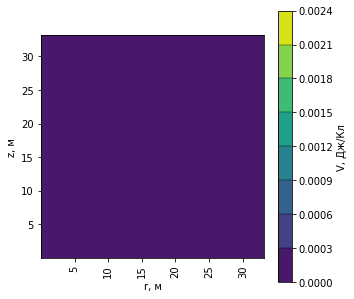

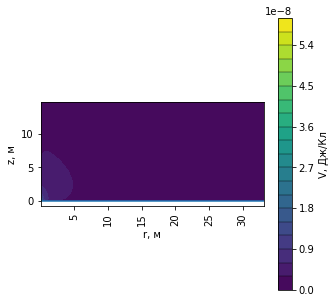

In [340]:
folder = "./b_results/meshs/mesh1/"

x,y,z,q = solution_xyz_read("solution_xyz_q")
start = 40
cut = 60
x0,x1 = 70,90
y0,y1 = x0,x1
z0,z1 = 22,40
print("z = 0")
paint_layer_uniform(x[x0:x1],y[y0:y1],q[0,y0:y1,x0:x1],(0,0,0,0),0)
print("y=0")
paint_layer_uniform(x[x0:x1],z[z0:z1],q[z0:z1,1,x0:x1],(0,0,0,0),20)

plt.plot(x[x0:x1],q[0,0,x0:x1])

[97, 97, 51]
(-500.0, -377.8497759046221, -251.89984993641474, -167.93323262427649, -111.95548774951766, -74.63699116634511, -49.757993444230074, -33.17199496282005, -22.114662641880034, -14.743107761253356, -9.82873784083557, -6.5524912272237135, -4.368326818149142, -2.912217212099428, -1.941477474732952, -1.294317649821968, -0.8628777665479787, -0.5752511776986524, -0.38350011846576826, -0.25566607897717886, -0.1704433859847859, -0.1136282573231906, -0.07575150488212706, -0.05050033658808471, -0.03366622439205647, -0.022443482928037647, -0.014961655285358432, -0.009973770190238955, -0.006648513460159303, -0.004431675640106202, -0.002953783760070801, -0.0019685225067138674, -0.001311681671142578, -0.0008737877807617187, -0.0005818585205078125, -0.000387239013671875, -0.00025749267578125, -0.0001709951171875, -0.000113330078125, -7.488671875e-05, -4.92578125e-05, -3.2171875e-05, -2.078125e-05, -1.31875e-05, -8.125000000000001e-06, -4.75e-06, -2.4999999999999998e-06, -1e-06, 0.0, 1e-06,

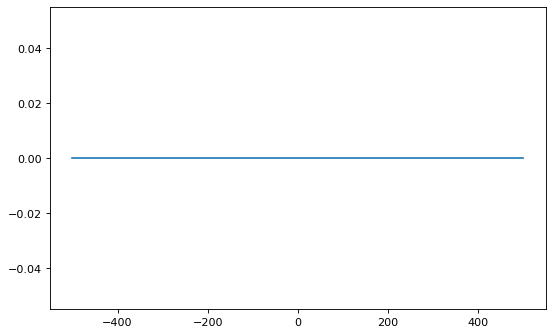

In [346]:
folder = "./b_results/meshs/mesh1/"

x,y,z,q = solution_xyz_read("solution_xyz_q")
start = 40
cut = 60
x0,x1 = 0,96
y0,y1 = x0,x1
z0,z1 = 0,50

fig, ax = plt.subplots(1,1,figsize=(8, 5), dpi= 80) 
plt.plot(x,q[0,:,0])

In [428]:
delete = np.array([10,9,8,7,6,3,2,1])
len(delete) - delete[::-1].searchsorted(4)

5

In [14]:
l1 = list(range(24))
l1 = np.array(l1).reshape(2,3,4)
print(l1)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [15]:
l1[:,:,2]

array([[ 2,  6, 10],
       [14, 18, 22]])

In [16]:
l2 = np.array([1,2.5,3,0,4,-0.2])
l2 = np.absolute(l2 - 5.)
l2.argmin()

4